# NEURAL TRANSFER USING PYTORCH
https://pytorch.org/tutorials/advanced/neural_style_tutorial.html

In [4]:
import time
import os
import copy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optims
import torchvision as tv
from PIL import Image

plt.rcParams['figure.figsize'] = [16,8]
plt.ion()  # interactive mode

is_gpu = torch.cuda.is_available()
device = torch.device('cuda:0' if is_gpu else 'cpu')
print(device)

num_workers = os.cpu_count()
print(num_workers)

# Ignore warnings for image input
import warnings
warnings.filterwarnings("ignore")

cuda:0
6


In [5]:
imsize = 512 if is_gpu else 128

In [9]:
resize = tv.transforms.Compose([
    tv.transforms.Resize(imsize),
    tv.transforms.ToTensor()])

def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = resize(image).unsqueeze(0)
    print(image.size())
    return image.to(device, torch.float32)

In [10]:
style_img_path = os.path.join('.', 'data', 'images', 'picasso.jpg')
target_img_path = os.path.join('.', 'data', 'images', 'cat.jpg')

style_img = image_loader(style_img_path)
content_img = image_loader(target_img_path)

assert style_img.size() == content_img.size(), \
    'we need to import style and content images of the same size'

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


In [20]:
# from Tensor C x H x W to Numpy.array H x W x C
# similar to tensor.numpy().transpose((1,2,0)) 
tensor2image = tv.transforms.ToPILImage()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)  # remove the fake batch dimension
    image = tensor2image(image)
    plt.imshow(image)

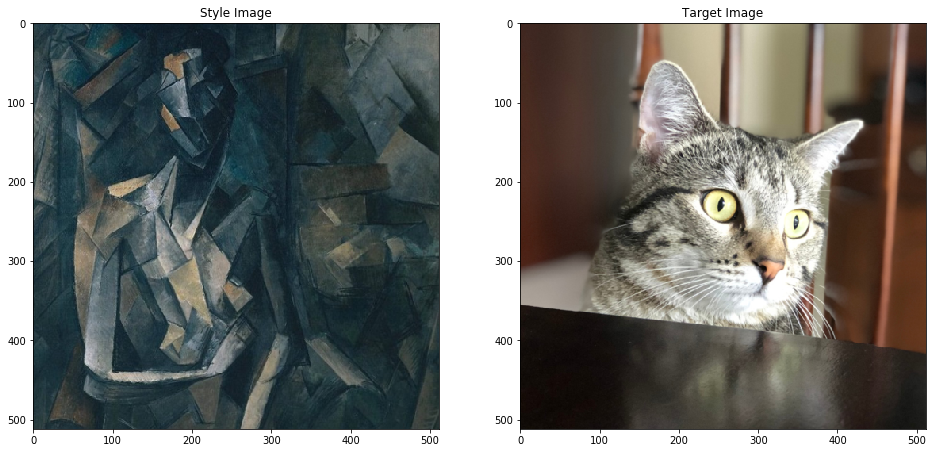

In [22]:
images = [style_img, content_img]
titles = ['Style Image', 'Target Image']
fig = plt.figure()
plt.tight_layout()
for i in range(2):
    ax = plt.subplot(121+i)
    ax.set_title(titles[i])
#     ax.axis('off') 
    imshow(images[i])
plt.show()